# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

heroes_df.head(5)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [3]:
powers_df.head(5)
powers_df.rename(columns={'hero_names':'name'}, inplace=True)

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df = heroes_df.drop('Unnamed: 0', axis=1)
heroes_df.head(5)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [43]:
powers_df.head(5)

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [6]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, name to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [7]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [8]:
powers_df.describe()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Emma Frost,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [9]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [10]:
powers_df.isna().sum()

name                     0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wallcrawling             0
V

In [11]:
powers_df.isna().sum().sum()

0

In [12]:
for col in heroes_df:
    print (heroes_df[col].unique())

['A-Bomb' 'Abe Sapien' 'Abin Sur' 'Abomination' 'Abraxas' 'Absorbing Man'
 'Adam Monroe' 'Adam Strange' 'Agent 13' 'Agent Bob' 'Agent Zero'
 'Air-Walker' 'Ajax' 'Alan Scott' 'Alex Mercer' 'Alex Woolsly'
 'Alfred Pennyworth' 'Alien' 'Allan Quatermain' 'Amazo' 'Ammo'
 'Ando Masahashi' 'Angel' 'Angel Dust' 'Angel Salvadore' 'Angela'
 'Animal Man' 'Annihilus' 'Ant-Man' 'Ant-Man II' 'Anti-Monitor'
 'Anti-Spawn' 'Anti-Venom' 'Apocalypse' 'Aquababy' 'Aqualad' 'Aquaman'
 'Arachne' 'Archangel' 'Arclight' 'Ardina' 'Ares' 'Ariel' 'Armor'
 'Arsenal' 'Astro Boy' 'Atlas' 'Atom' 'Atom Girl' 'Atom II' 'Atom III'
 'Atom IV' 'Aurora' 'Azazel' 'Azrael' 'Aztar' 'Bane' 'Banshee' 'Bantam'
 'Batgirl' 'Batgirl III' 'Batgirl IV' 'Batgirl V' 'Batgirl VI' 'Batman'
 'Batman II' 'Battlestar' 'Batwoman V' 'Beak' 'Beast' 'Beast Boy' 'Beetle'
 'Ben 10' 'Beta Ray Bill' 'Beyonder' 'Big Barda' 'Big Daddy' 'Big Man'
 'Bill Harken' 'Billy Kincaid' 'Binary' 'Bionic Woman' 'Bird-Brain'
 'Bird-Man' 'Bird-Man II' 'Birdman' 'B

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [13]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [14]:
heroes_df[heroes_df["Publisher"].isnull()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [15]:
heroes_df[heroes_df["Weight"].isnull()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
389,King Kong,Male,yellow,Animal,Black,30.5,NaN,-,good,NaN


In [16]:
heroes_df = heroes_df.drop(heroes_df.index[[286,389]])
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     13
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [17]:
# Since there were only 2 rows with null numerical data, I decided to just drop them as they are not a significant
# fraction of the total number of rows.

# For the remaining 13 null values in the Publisher column. I am going to replace them with 'Unknown' to better 
# represent the lack of info.

In [18]:
heroes_df.Publisher.fillna('Unknown', inplace=True)
heroes_df[heroes_df["Publisher"].isnull()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [19]:
heroes_df.isna().sum()

# All NaN values in heroes_df are now taken care of.

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [20]:
heroes_df.Weight.unique()

array([441.,  65.,  90., -99., 122.,  88.,  61.,  81., 104., 108.,  72.,
       169., 173., 101.,  68.,  57.,  54.,  83.,  86., 358., 135., 106.,
       146.,  63.,  98., 270.,  59.,  50., 126.,  67., 180.,  77.,  52.,
        95.,  79., 133., 181., 216.,  71., 124., 155., 113.,  58.,  92.,
        97.,  56., 230., 495.,  55., 110.,  99., 158.,  74., 116.,  62.,
       170.,  70.,  78., 225., 817.,  27.,  91., 178., 383., 171., 187.,
       132.,  89., 412., 306.,  80., 203.,  96.,  18.,  45., 167.,  16.,
       630., 268., 115.,   4.,  48., 119., 207., 191.,   2.,  14.,  49.,
       855., 356., 324., 360., 288., 236.,  36., 140., 128., 338., 248.,
       125.,  85., 293.,  69., 405., 117.,  87., 234., 320.,  38.,  25.,
       900., 310., 149., 315., 153., 437., 131.,  47., 176., 198., 443.,
       143.,  76.,  82., 105., 331., 214.,  73., 334.,  41., 162.,  39.,
       473.,  51.,  17.])

In [21]:
heroes_df.Height.unique()

array([203. , 191. , 185. , -99. , 193. , 173. , 178. , 188. , 180. ,
       244. , 257. , 183. , 165. , 163. , 211. ,  61. , 229. , 213. ,
       175. , 198. , 168. , 170. , 201. , 218. ,  30.5, 196. , 157. ,
       226. , 267. , 122. , 975. , 142. , 876. ,  62.5, 701. , 259. ,
        79. , 155. ,  71. , 287. , 234. ,  64. , 366. , 206. , 305. ,
       297. , 137. , 279. ,  15.2, 140. , 160. , 304.8,  66. ])

In [22]:
# There was one value in the weight column below 0 at -99 and one in the height column as well. 
# To clean these anamolies I will replace them with the median of the each data set

heroes_df.Weight = heroes_df.Weight.map(lambda x: heroes_df.Weight.median() if x < 0 else x)
heroes_df.Height = heroes_df.Height.map(lambda x: heroes_df.Height.median() if x < 0 else x)

heroes_df.Weight.unique()
heroes_df.Height.unique()

array([203. , 191. , 185. , 175. , 193. , 173. , 178. , 188. , 180. ,
       244. , 257. , 183. , 165. , 163. , 211. ,  61. , 229. , 213. ,
       198. , 168. , 170. , 201. , 218. ,  30.5, 196. , 157. , 226. ,
       267. , 122. , 975. , 142. , 876. ,  62.5, 701. , 259. ,  79. ,
       155. ,  71. , 287. , 234. ,  64. , 366. , 206. , 305. , 297. ,
       137. , 279. ,  15.2, 140. , 160. , 304.8,  66. ])

In [23]:
# In some of the other non-numerical columns there are data points marked as '-'. Those will just be ignored for now
# as they should not have an impact later on in analysis.

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [49]:
df = heroes_df.join(powers_df, how='inner', rsuffix=' ')
df.set_index('name')
df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,-,bad,62.0,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

Text(0, 0.5, 'Weight')

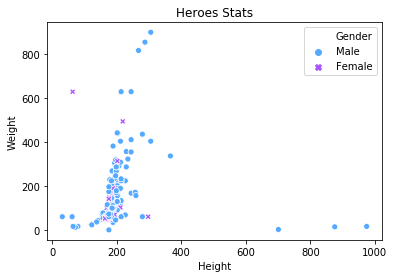

In [50]:


mf_df = df.loc[(df['Gender'] == 'Male') | (df['Gender'] == 'Female')]

ax = sns.scatterplot(x='Height', y="Weight", hue="Gender", style="Gender", data=mf_df, palette='cool')

plt.title('Heroes Stats')
plt.xlabel('Height')
plt.ylabel('Weight')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [35]:
male_df = df.loc[df['Gender'] == 'Male']
female_df = df.loc[df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    ax = sns.distplot(male_df[column_name] if gender.upper() == 'MALE' else female_df[column_name])
    return

188.03787878787878


C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


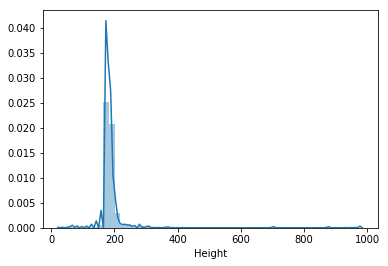

In [36]:
# Male Height
show_distplot(df, 'Male', 'Height')
print(male_df['Height'].mean())

105.17099567099567


C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


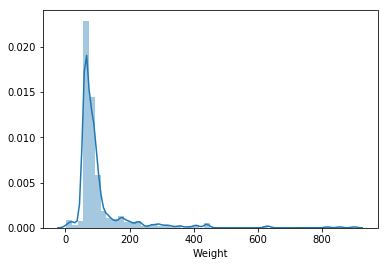

In [37]:
# Male Weight
show_distplot(df, 'Male', 'Weight')
print(male_df['Weight'].mean())

173.97457627118644


C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


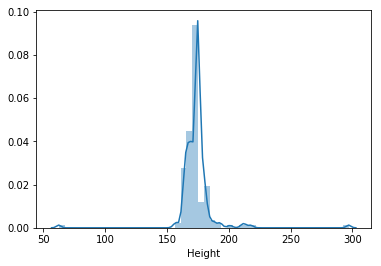

In [38]:
# Female Height
show_distplot(df, 'Female', 'Height')
print(female_df['Height'].mean())

71.98870056497175


C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


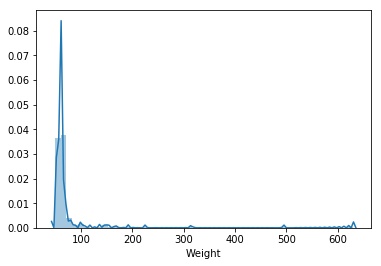

In [39]:
# Female Weight
show_distplot(df, 'Female', 'Weight')
print(female_df['Weight'].mean())

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



In [ ]:
# The distribution for male hero weight, height and female weight are all skewed right.
# The distribution for female height is normal.
# All 4 distributions are narrow

# The average male hero is 188 tall and weighs 105.
# The average female hero is 174 tall and weighs 72.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [108]:
df.loc[:, 'Agility'::].sum().sort_values(ascending = False).head(20)
# The 5 most common powers are Super Strength, Stamina, Durability, Super Speed, and Agility

Super Strength         358
Stamina                288
Durability             256
Super Speed            248
Agility                241
Flight                 211
Accelerated Healing    177
Reflexes               163
Intelligence           158
Energy Blasts          147
Stealth                126
Marksmanship           119
Invulnerability        116
Longevity              112
Weapons Master         104
Telepathy               92
Enhanced Senses         88
Force Fields            86
Energy Absorption       77
Teleportation           72
dtype: int64

In [60]:
df.loc[df['Publisher'] == 'Marvel Comics'].loc[:, 'Agility'::].sum().sort_values(ascending=False).head(5)
# The most common powers for Marvel heroes are Super Strength, Stamina, Durability, Super Speed, and Agility

Super Strength    194
Stamina           142
Durability        138
Super Speed       131
Agility           113
dtype: int64

In [59]:
df.loc[df['Publisher'] == 'DC Comics'].loc[:, 'Agility'::].sum().sort_values(ascending=False).head(5)
#The most common powers for DC heroes are Super Strength, Stamina, Agility, Durability, and Super Speed

Super Strength    97
Stamina           91
Agility           81
Durability        76
Super Speed       75
dtype: int64

In [ ]:
# The top 5 powers are consistent across both Marvel and DC heroes. With the order of the top 5 only changing slightly
# These are the same top 5 powers as the overall top 5 in the superheroes dataset.

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [66]:
df.loc[df['Alignment'] == 'good'].loc[:, 'Agility'::].sum().sort_values(ascending=False).head(10)

Super Strength         239
Stamina                207
Super Speed            178
Durability             174
Agility                164
Flight                 143
Accelerated Healing    123
Intelligence           115
Reflexes               114
Energy Blasts           99
dtype: int64

In [106]:
male_good = len(df.loc[df['Alignment'] == 'good'].loc[df['Gender'] == 'Male'].name)

In [105]:
female_good = len(df.loc[df['Alignment'] == 'good'].loc[df['Gender'] == 'Female'].name)

In [104]:
male_bad = len(df.loc[df['Alignment'] == 'bad'].loc[df['Gender'] == 'Male'].name)

In [103]:
female_bad = len(df.loc[df['Alignment'] == 'bad'].loc[df['Gender'] == 'Female'].name)

Text(0.5, 1.0, 'Alignment Distribution of Heroes')

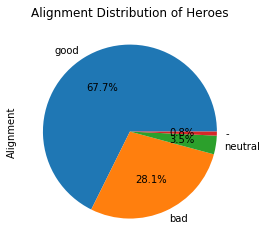

In [130]:
df.Alignment.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Alignment Distribution of Heroes')

Text(0.5, 1.0, 'Gender Distribution of Heroes')

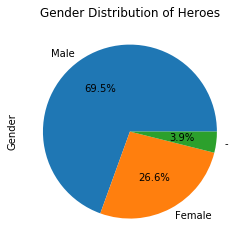

In [129]:
df.Gender.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Heroes')

Text(0.5, 1.0, 'Gender Distribution of Good Heroes')

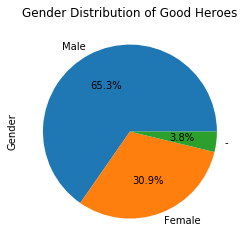

In [128]:
df.loc[df['Alignment'] == 'good'].Gender.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Good Heroes')

Text(0.5, 1.0, 'Gender Distribution of Bad Heroes')

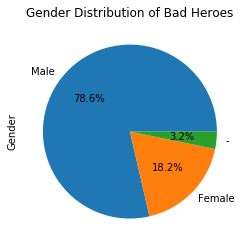

In [131]:
df.loc[df['Alignment'] == 'bad'].Gender.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Bad Heroes')

Text(0.5, 1.0, 'Gender Distribution of Neutral Heroes')

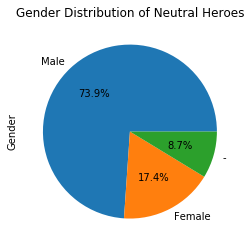

In [132]:
df.loc[df['Alignment'] == 'neutral'].Gender.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Neutral Heroes')

In [107]:
df.loc[df['Super Strength'] == True].loc[:, 'Agility'::].sum().sort_values(ascending=False).head(5)

Super Strength    358
Durability        226
Stamina           220
Super Speed       218
Agility           167
dtype: int64

In [110]:
df.loc[df['Agility'] == True].loc[:, 'Agility'::].sum().sort_values(ascending=False).head(5)

Agility           241
Stamina           178
Super Strength    167
Super Speed       141
Reflexes          124
dtype: int64

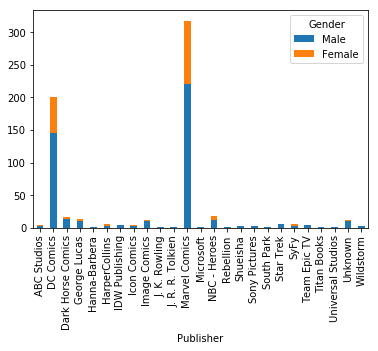

In [171]:
publisher_grouped = df.groupby(['Publisher', 'Gender'])['Publisher'].count().unstack('Gender').fillna(0)
publisher_grouped[['Male', 'Female']].plot(kind='bar', stacked=True)

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data